## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 153us/step - loss: 2.2535 - acc: 0.1765 - val_loss: 2.2013 - val_acc: 0.2057
Epoch 2/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.1737 - acc: 0.2233 - val_loss: 2.1457 - val_acc: 0.2375
Epoch 3/500
50000/50000 [==============================] - 4s 74us/step - loss: 2.1232 - acc: 0.2498 - val_loss: 2.1011 - val_acc: 0.2659
Epoch 4/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.0828 - acc: 0.2656 - val_loss: 2.0642 - val_acc: 0.2769
Epoch 5/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.0496 - acc: 0.2778 - val_loss: 2.0345 - val_acc: 0.2833
Epoch 6/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.0220 - acc: 0.2878 - val_loss: 2.0086 - val_acc: 0.2976
Epoch 7/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.9977 - acc: 0.2979 - val_loss: 1.9870 -

50000/50000 [==============================] - 4s 76us/step - loss: 1.6624 - acc: 0.4175 - val_loss: 1.6664 - val_acc: 0.4149
Epoch 60/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6592 - acc: 0.4181 - val_loss: 1.6637 - val_acc: 0.4141
Epoch 61/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6562 - acc: 0.4194 - val_loss: 1.6605 - val_acc: 0.4203
Epoch 62/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6534 - acc: 0.4205 - val_loss: 1.6569 - val_acc: 0.4202
Epoch 63/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6506 - acc: 0.4215 - val_loss: 1.6578 - val_acc: 0.4198
Epoch 64/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6480 - acc: 0.4219 - val_loss: 1.6539 - val_acc: 0.4184
Epoch 65/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6451 - acc: 0.4236 - val_loss: 1.6518 - val_acc: 0.4211
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 4s 75us/step - loss: 1.5280 - acc: 0.4652 - val_loss: 1.5528 - val_acc: 0.4540
Epoch 118/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5264 - acc: 0.4647 - val_loss: 1.5492 - val_acc: 0.4560
Epoch 119/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5243 - acc: 0.4660 - val_loss: 1.5476 - val_acc: 0.4577
Epoch 120/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5227 - acc: 0.4657 - val_loss: 1.5477 - val_acc: 0.4536
Epoch 121/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.5210 - acc: 0.4675 - val_loss: 1.5445 - val_acc: 0.4567
Epoch 122/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5187 - acc: 0.4678 - val_loss: 1.5437 - val_acc: 0.4594
Epoch 123/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5173 - acc: 0.4676 - val_loss: 1.5438 - val_acc: 0.4592
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 1.4321 - acc: 0.4996 - val_loss: 1.4912 - val_acc: 0.4765
Epoch 176/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.4309 - acc: 0.4989 - val_loss: 1.4807 - val_acc: 0.4764
Epoch 177/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4298 - acc: 0.4995 - val_loss: 1.4788 - val_acc: 0.4785
Epoch 178/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.4278 - acc: 0.5007 - val_loss: 1.4816 - val_acc: 0.4731
Epoch 179/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.4264 - acc: 0.5016 - val_loss: 1.4788 - val_acc: 0.4766
Epoch 180/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.4250 - acc: 0.5035 - val_loss: 1.4820 - val_acc: 0.4716
Epoch 181/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.4231 - acc: 0.5030 - val_loss: 1.4745 - val_acc: 0.4828
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 1.3521 - acc: 0.5273 - val_loss: 1.4317 - val_acc: 0.4959
Epoch 234/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.3510 - acc: 0.5263 - val_loss: 1.4323 - val_acc: 0.4899
Epoch 235/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3504 - acc: 0.5272 - val_loss: 1.4361 - val_acc: 0.4825
Epoch 236/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3479 - acc: 0.5279 - val_loss: 1.4563 - val_acc: 0.4822
Epoch 237/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.3472 - acc: 0.5303 - val_loss: 1.4255 - val_acc: 0.4939
Epoch 238/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.3461 - acc: 0.5294 - val_loss: 1.4283 - val_acc: 0.4969
Epoch 239/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.3443 - acc: 0.5305 - val_loss: 1.4350 - val_acc: 0.4910
Epoch 240/500
50000/50000 [======

50000/50000 [==============================] - 4s 74us/step - loss: 1.2820 - acc: 0.5531 - val_loss: 1.3990 - val_acc: 0.4988
Epoch 292/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2814 - acc: 0.5520 - val_loss: 1.4134 - val_acc: 0.5033
Epoch 293/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2801 - acc: 0.5517 - val_loss: 1.3953 - val_acc: 0.5076
Epoch 294/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2790 - acc: 0.5529 - val_loss: 1.4025 - val_acc: 0.4985
Epoch 295/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2784 - acc: 0.5521 - val_loss: 1.3984 - val_acc: 0.5058
Epoch 296/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2763 - acc: 0.5542 - val_loss: 1.4082 - val_acc: 0.4952
Epoch 297/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2755 - acc: 0.5543 - val_loss: 1.3938 - val_acc: 0.5066
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 74us/step - loss: 1.2184 - acc: 0.5743 - val_loss: 1.3844 - val_acc: 0.5078
Epoch 350/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.2170 - acc: 0.5745 - val_loss: 1.3905 - val_acc: 0.5098
Epoch 351/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2165 - acc: 0.5746 - val_loss: 1.3735 - val_acc: 0.5125
Epoch 352/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2150 - acc: 0.5761 - val_loss: 1.3736 - val_acc: 0.5133
Epoch 353/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2134 - acc: 0.5780 - val_loss: 1.3674 - val_acc: 0.5134
Epoch 354/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.2126 - acc: 0.5753 - val_loss: 1.3694 - val_acc: 0.5108
Epoch 355/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2113 - acc: 0.5759 - val_loss: 1.3737 - val_acc: 0.5057
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 5s 97us/step - loss: 1.1587 - acc: 0.5949 - val_loss: 1.3972 - val_acc: 0.5016
Epoch 408/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.1581 - acc: 0.5945 - val_loss: 1.3959 - val_acc: 0.5098
Epoch 409/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1553 - acc: 0.5973 - val_loss: 1.3532 - val_acc: 0.5186
Epoch 410/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.1543 - acc: 0.5962 - val_loss: 1.3643 - val_acc: 0.5116
Epoch 411/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.1538 - acc: 0.5980 - val_loss: 1.3721 - val_acc: 0.5123
Epoch 412/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.1520 - acc: 0.5975 - val_loss: 1.3959 - val_acc: 0.5136
Epoch 413/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1509 - acc: 0.5973 - val_loss: 1.3814 - val_acc: 0.5076
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 77us/step - loss: 1.0987 - acc: 0.6159 - val_loss: 1.3803 - val_acc: 0.5121
Epoch 466/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0992 - acc: 0.6169 - val_loss: 1.4178 - val_acc: 0.5054
Epoch 467/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0981 - acc: 0.6169 - val_loss: 1.3766 - val_acc: 0.5137
Epoch 468/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.0980 - acc: 0.6176 - val_loss: 1.3844 - val_acc: 0.5200
Epoch 469/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.0945 - acc: 0.6176 - val_loss: 1.3595 - val_acc: 0.5196
Epoch 470/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.0929 - acc: 0.6177 - val_loss: 1.3844 - val_acc: 0.5171
Epoch 471/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.0937 - acc: 0.6196 - val_loss: 1.3565 - val_acc: 0.5222
Epoch 472/500
50000/50000 [=======

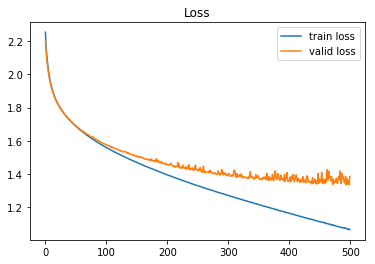

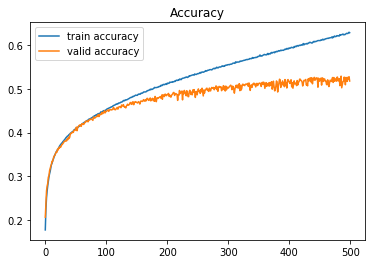

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()